# Analyzing CIA Factbook Using SQLite/Python
## Compiled By: Dana Hagist

In this project, I'll work with data from the CIA World Factbook, a compendium of statistics about all of the countries on Earth. The Factbook contains demographic information like:

- population - The population as of 2015.
- population_growth - The annual population growth rate, as a percentage.
- area - The total land and water area.

You can download the SQLite database, factbook.db, from https://github.com/factbook/factbook.sql/releases if you want to work with it on your own computer. In this guided project, I'll explore the Python SQLite workflow to explore, analyze, and visualize data from this database. First things first, I'll get familiar with the database.

Throughout this course, Dataquest always introduced the name of the table and what the table looked like in the jobs.db database we worked with. We can actually query the database to get this information directly:

SELECT * FROM sqlite_master WHERE type='table';

In the last mission, I learned how to connect to a SQLite database and query it using the sqlite3 module. When working in the Jupyter notebook environment, we can actually use pandas to run SQL queries and display the results neatly as a DataFrame object. We create a sqlite3.Connection instance as usual and then use pandas.read_sql_query(sql, con) to handle running the query and returning the results in a table:

import sqlite3

import pandas as pd

conn = sqlite3.connect("factbook.db")



q = "SELECT * FROM sqlite_master WHERE type='table';"

pd.read_sql_query(q, conn)
			

You may be wondering why we're using SQLite at all if we're just reading in the results into pandas dataframes anyway. Why not just use pandas? First, most data analysts and data scientists in industry use a SQL GUI based tool which:

- let you write queries and save them for later
- let you run queries against multiple enterprise database systems (MySQL, Postgres, etc.)
- return results as a table
- create standard visualizations like line charts, bar plots, and histograms from the results table without any programming

Here are some examples of GUI based SQL tools:

- Mode Analytics
- Periscope Data
- MySQL Workbench
- Jack DB

We're using pandas and matplotlib to display results neatly and visualize them because they let us focus on practicing thinking and working in SQL. I'll spend most of my time in SQL in this guided project and will inteface with pandas and matplotlib minimally.

You can find the solutions notebook for this guided project at https://github.com/dataquestio/solutions/blob/master/Mission257Solutions.ipynb

Task: 
- Import pandas and sqlite3.
- Connect to factbook.db and use pandas.read_sql_query() to return information on the tables in the database.

In [1]:
# Solution
import sqlite3
import pandas as pd
conn = sqlite3.connect('factbook.db')

In [3]:
# Solution, cont:
q= "select * from sqlite_master WHERE type='table';"
pd.read_sql_query(q, conn)

type             name         tbl_name  rootpage  \
0  table            facts            facts         2   
1  table  sqlite_sequence  sqlite_sequence         3   

                                                 sql  
0  CREATE TABLE "facts" ("id" INTEGER PRIMARY KEY...  
1             CREATE TABLE sqlite_sequence(name,seq)

Task: Write and run another query that returns the first 5 rows of the only table in the database.

In [4]:
# Solution: 
q ="select * from facts limit 5;"
pd.read_sql_query(q,conn)

id code         name     area  area_land  area_water  population  \
0   1   af  Afghanistan   652230     652230           0    32564342   
1   2   al      Albania    28748      27398        1350     3029278   
2   3   ag      Algeria  2381741    2381741           0    39542166   
3   4   an      Andorra      468        468           0       85580   
4   5   ao       Angola  1246700    1246700           0    19625353   

   population_growth  birth_rate  death_rate  migration_rate  \
0               2.32       38.57       13.89            1.51   
1               0.30       12.92        6.58            3.30   
2               1.84       23.67        4.31            0.92   
3               0.12        8.13        6.96            0.00   
4               2.78       38.78       11.49            0.46   

                   created_at                  updated_at  
0  2015-11-01 13:19:49.461734  2015-11-01 13:19:49.461734  
1  2015-11-01 13:19:54.431082  2015-11-01 13:19:54.431082  
2  2015-11-01 13:19:59.961286  2015-11-01 13:19:59.961286  
3  2015-11-01 13:20:03.659945  2015-11-01 13:20:03.659945  
4  2015-11-01 13:20:08.625072  2015-11-01 13:20:08.625072

### Calculating Summary Statistics

We now know that factbook.db contains a single table, the facts table.

Here are the descriptions for some of the columns:

- name - The name of the country.
- area - The total land and sea area of the country.
- population - The country's population.
- population_growth- The country's population growth as a percentage.
- birth_rate - The country's birth rate, or the number of births a year per 1,000 people.
- death_rate - The country's death rate, or the number of death a year per 1,000 people.
- area- The country's total area (both land and water).
- area_land - The country's land area in square kilometers.
- area_water - The country's waterarea in square kilometers.

Let's start by calculating some summary statistics and look for any outlier countries.

Task: Write a single query that returns the:

- minimum population
- maximum population
- minimum population growth
- maximum population growth

In [6]:
# Solution:
q= "select min(population) min_population, max(population) max_population, min(population_growth) min_pop_growth, max(population_growth) max_pop_growth from facts;"
pd.read_sql_query(q,conn)

min_population  max_population  min_pop_growth  max_pop_growth
0               0      7256490011             0.0            4.02

### Understanding the Outliers

A few things stick out from the summary statistics in the last screen:

- there's a country with a population of 0
- there's a country with a population of 7256490011 (or more than 7.2 billion people)

Let's zoom in on just these countries.

Task: Write a query that returns the countrie(s) with a population of 0.

In [7]:
# Solution: 
q= 'select name from facts where population=0'
pd.read_sql_query(q, conn)

name
0  Antarctica

Task: Write a query that returns the countrie(s) with a population of 7256490011.

In [8]:
# Solution: 
q = 'select name from facts where population = 7256490011'
pd.read_sql_query(q, conn)

name
0  World

Task: In a markdown cell, type up your observations on these rows.

Solution: The above two queries show that the only country with no population is Antarctica, and that there is a "name," generally representing a country, that is actually representing the world in this dataset and the population represents the global population.

### Generating Histograms

It seems like the table contains a row for the whole world, which explains the population of over 7.2 billion. It also seems like the table contains a row for Antarctica, which explains the population of 0. This seems to match the CIA Factbook page for Antarctica at https://www.cia.gov/library/publications/the-world-factbook/geos/ay.html

Let's move on to generating histograms for the rest of the countries in the table, ignoring these 2 rows. You'll want to write a query that returns all of the values in the columns you want to visualize, including population, population growth, birth rate, and death rate.

Once the results table is represented as a dataframe, you can use the pd.DataFrame.hist() method to generate histograms for all of the columns.

Task: Using just the non-outlier rows, generate a 2 by 2 grid of histograms for the following columns:

- population
- population_growth
- birth_rate
- death_rate

In [9]:
# Importing required libraries:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2885: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe4506fc080>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fe44e5b72b0>]], dtype=object)

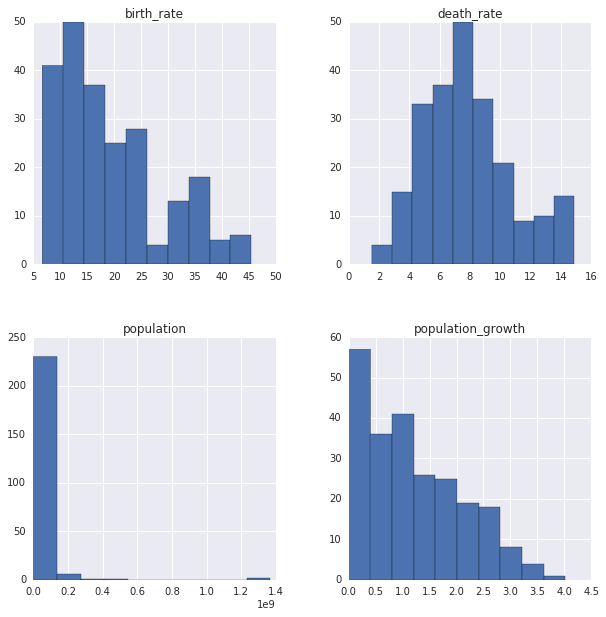

In [10]:
# Solution: 
q="select population, population_growth, birth_rate, death_rate from facts where population !=0 and population !=7256490011"
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)
pd.read_sql_query(q,conn).hist(ax=ax)

### Potential Next Steps:

- Which countries have the highest population density?
    - Population density is the ratio of population to land area. Compare your results with those from Wikipedia.
- Generate a histogram of population densities.
- Which countries have the highest ratios of water to land? Which countries have more water than land?


In [11]:
# Additional Analysis Steps
q = 'select * from facts limit 1;'
pd.read_sql_query(q, conn)
#Running this just as a reminder for the available column names

id code         name    area  area_land  area_water  population  \
0   1   af  Afghanistan  652230     652230           0    32564342   

   population_growth  birth_rate  death_rate  migration_rate  \
0               2.32       38.57       13.89            1.51   

                   created_at                  updated_at  
0  2015-11-01 13:19:49.461734  2015-11-01 13:19:49.461734

In [13]:
# Understanding Population Density
q='select name, population/area_land as pop_density from facts order by pop_density desc;'
pd.read_sql_query(q, conn).head(20)

name  pop_density
0          Macau      21168.0
1         Monaco      15267.0
2      Singapore       8259.0
3      Hong Kong       6655.0
4     Gaza Strip       5191.0
5      Gibraltar       4876.0
6        Bahrain       1771.0
7       Maldives       1319.0
8          Malta       1310.0
9        Bermuda       1299.0
10    Bangladesh       1297.0
11  Sint Maarten       1167.0
12      Guernsey        847.0
13        Jersey        838.0
14        Taiwan        725.0
15      Barbados        675.0
16     Mauritius        660.0
17         Aruba        623.0
18       Lebanon        604.0
19  Saint Martin        588.0

Analysis: It appeears that many of the countries with the highest population density reside in Asia.  Furthermore, there is larger population density in countries closer to the equator than those further away.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe44e4b7278>], dtype=object)

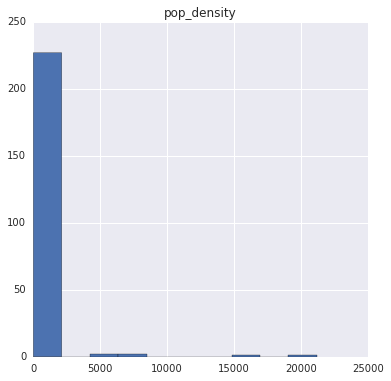

In [14]:
# Quick Histogram Representation of Population Density
q='select population/area_land as pop_density from facts order by pop_density desc;'
fig=plt.figure(figsize=(6,6))
ax=fig.add_subplot(111)
pd.read_sql_query(q, conn).hist(ax=ax)